# Importing and Cleaning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_df = pd.read_csv("/kaggle/input/playground-series-s4e7/test.csv")
train_df = pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv")
sample_df = pd.read_csv("/kaggle/input/playground-series-s4e7/sample_submission.csv")

In [3]:
test_df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [4]:
train_df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [5]:
sample_df.head(5)

,id,Response
0,11504798,0.5
1,11504799,0.5
2,11504800,0.5
3,11504801,0.5
4,11504802,0.5


In [6]:
print(train_df.shape)
print(test_df.shape)

(11504798, 12)
(7669866, 11)


In [7]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
train_df.duplicated().sum()

0

In [9]:
train_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,11504798.0,5.752398e+06,3.321149e+06,0.0,2876199.25,5752398.5,8628597.75,11504797.0
Age,11504798.0,3.838356e+01,1.499346e+01,20.0,24.00,36.0,49.00,85.0
Driving_License,11504798.0,9.980220e-01,4.443120e-02,0.0,1.00,1.0,1.00,1.0
Region_Code,11504798.0,2.641869e+01,1.299159e+01,0.0,15.00,28.0,35.00,52.0
Previously_Insured,11504798.0,4.629966e-01,4.986289e-01,0.0,0.00,0.0,1.00,1.0
Annual_Premium,11504798.0,3.046137e+04,1.645475e+04,2630.0,25277.00,31824.0,39451.00,540165.0
Policy_Sales_Channel,11504798.0,1.124254e+02,5.403571e+01,1.0,29.00,151.0,152.00,163.0
Vintage,11504798.0,1.638977e+02,7.997953e+01,10.0,99.00,166.0,232.00,299.0
Response,11504798.0,1.229973e-01,3.284341e-01,0.0,0.00,0.0,0.00,1.0


In [11]:
train_df.describe(include='object').T

,count,unique,top,freq
Gender,11504798,2,Male,6228134
Vehicle_Age,11504798,3,1-2 Year,5982678
Vehicle_Damage,11504798,2,Yes,5783229


# Visualization

In [12]:
# sns.pairplot(train_df)
# plt.show()

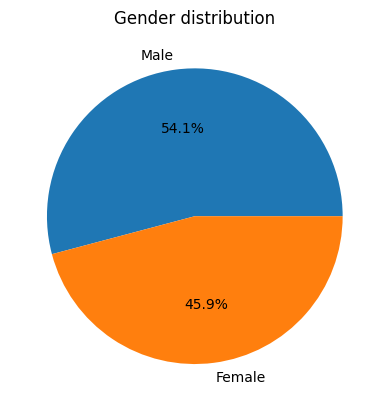

In [13]:
plt.pie(train_df["Gender"].value_counts(), labels = ["Male", "Female"], autopct = '%1.1f%%')
plt.title("Gender distribution")
plt.show()

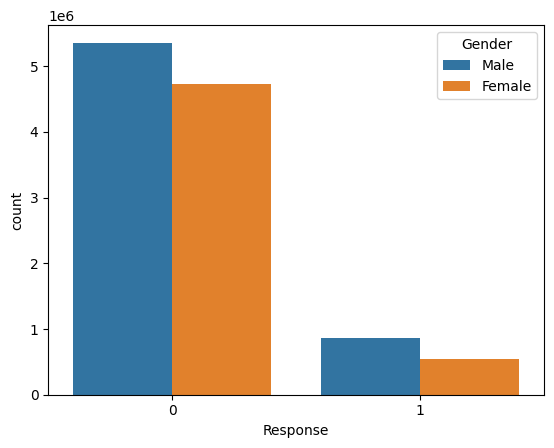

In [14]:
sns.countplot(data = train_df, x="Response", hue="Gender")
plt.show()

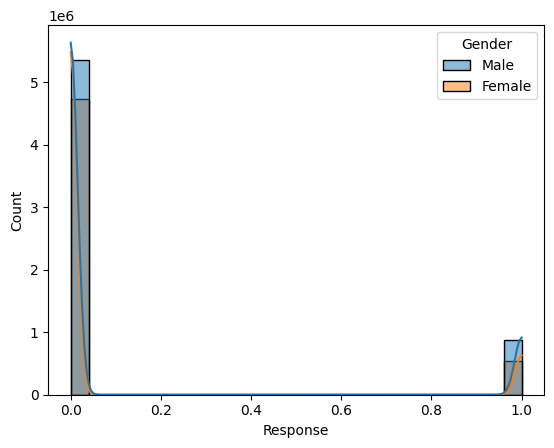

In [15]:
sns.histplot(data = train_df, x = "Response", kde = True, hue = "Gender")
plt.show()

In [16]:
#modification
train_df["Gender"] = train_df["Gender"].replace(["Female", "Male"], [0,1])
train_df["Vehicle_Age"] = train_df["Vehicle_Age"].replace(["1-2 Year", "< 1 Year", "> 2 Years"], [0, 1, 2])
train_df["Vehicle_Damage"] = train_df["Vehicle_Damage"].replace(["No", "Yes"], [0, 1])
train_df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.0,0,0,1,65101.0,124.0,187,0
1,1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,2,0,25,1,14.0,1,1,0,38043.0,152.0,254,0
3,3,0,35,1,1.0,0,0,1,2630.0,156.0,76,0
4,4,0,36,1,15.0,1,0,0,31951.0,152.0,294,0


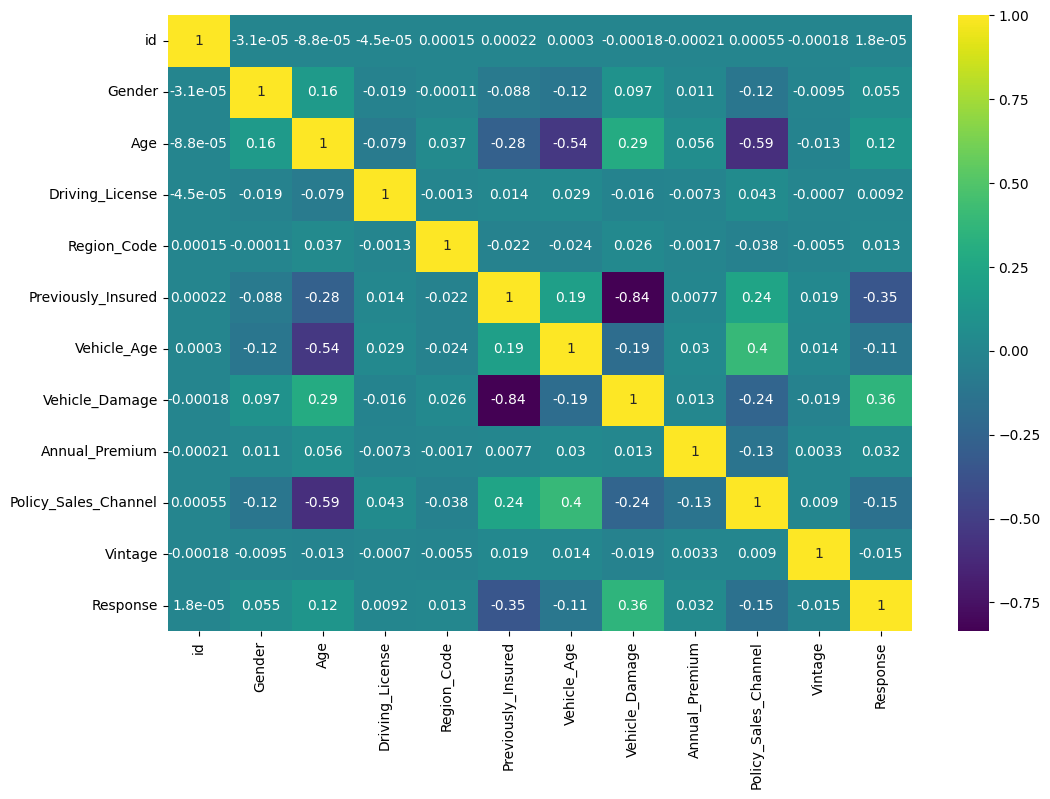

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(train_df.corr(), annot = True, cmap = "viridis")
plt.show()

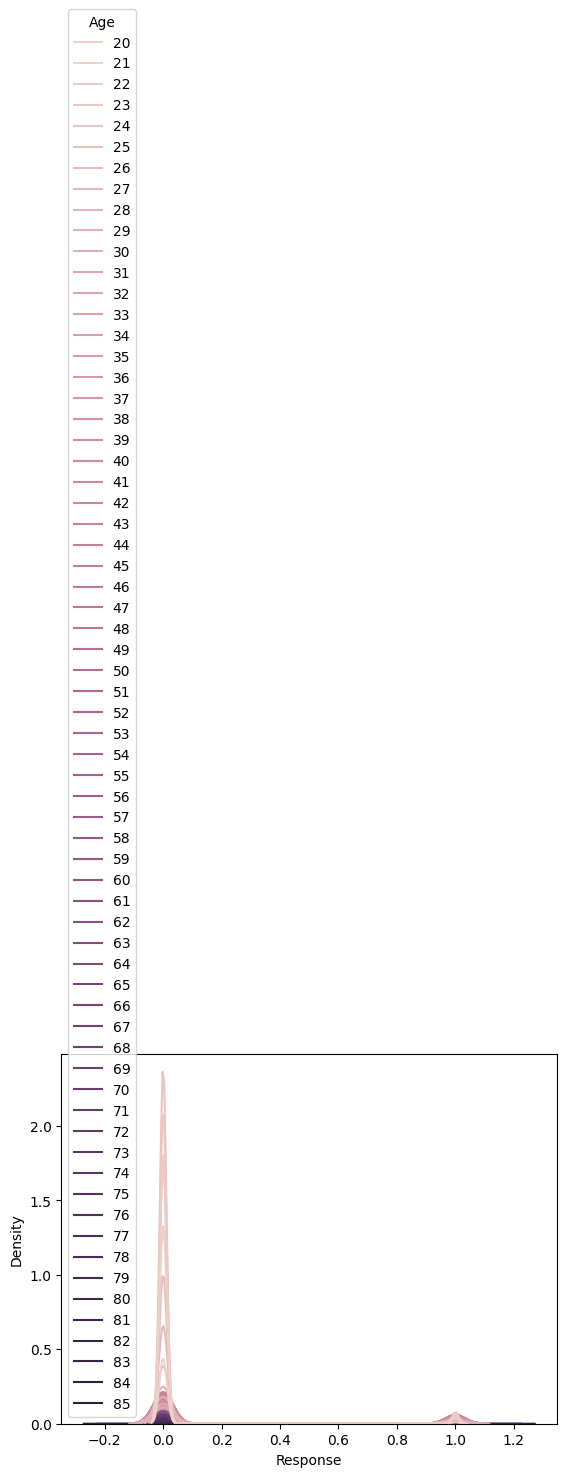

In [18]:
sns.kdeplot(data = train_df, x="Response", hue="Age")
plt.show()

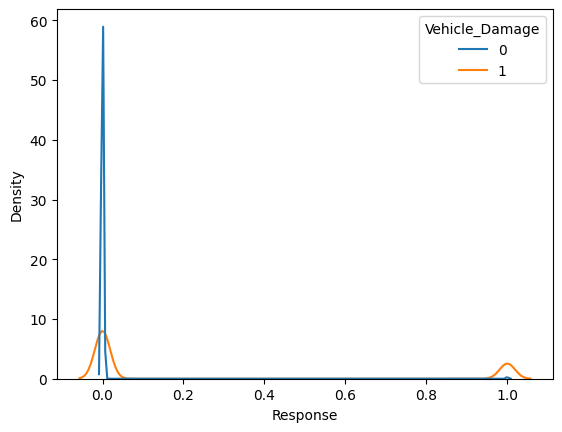

In [19]:
sns.kdeplot(data = train_df, x="Response", hue="Vehicle_Damage")
plt.show()

# Submission

In [20]:
submission_df = test_df.copy()

In [21]:
submission_df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [22]:
#just assigning all 0 for response
submission_df['Response'] = 0

In [23]:
submission_df.tail(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
7669861,19174659,Male,57,1,28.0,0,1-2 Year,Yes,51661.0,124.0,109,0
7669862,19174660,Male,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184,0
7669863,19174661,Male,47,1,33.0,1,1-2 Year,No,2630.0,138.0,63,0
7669864,19174662,Male,30,1,28.0,0,< 1 Year,Yes,38866.0,124.0,119,0
7669865,19174663,Male,23,1,46.0,1,< 1 Year,No,27498.0,152.0,79,0


In [24]:
submission_df.loc[submission_df['Vehicle_Damage'] == "Yes", 'Response']=1

In [25]:
submission_df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228,0
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123,1
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271,1
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115,0
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148,0


In [26]:
df = submission_df[['id', 'Response']]

In [27]:
df.head(5)

,id,Response
0,11504798,0
1,11504799,1
2,11504800,1
3,11504801,0
4,11504802,0


In [28]:
df.to_csv('v2.csv', index = False)